In [1]:
%%capture
%run data_analysis.ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta, date

## Features Engineering

Idées 

* Nombre d'activités dernier 30 jours avant aujourd'hui
* Ecart de jour depuis la derniere activité ou en heure ( récupération ? ) 
* Moyenne 30 derniers jours speed , heart_rate , watts , calories , suffer_score ? 
* Home Trainer ou pas 
* Heure de la journée de début ? =)
* Mois de l'année ( meilleure performance , hiver été etc... ) 

**Temps d'activité ( min )  dernier 30 jours avant aujourd'hui**

Erreur si on fait plusieurs activitées le meme jour... mais cas marginal

In [3]:
def time_activities_last_30d(segments, activities):
    time_activities_last_30d = []
    for date in segments['start_date']:
        end_date = date - timedelta(days=1)
        start_date = end_date - timedelta(days=30)
        result = activities[activities['start_date'].between(start_date,end_date)]
        time_activities = round((result['elapsed_time'].sum()/60),2)
        time_activities_last_30d.append(time_activities)
    segments['time_activities_last_30d'] = time_activities_last_30d
    return segments

In [4]:
segments = time_activities_last_30d(segments_df, activities_df)

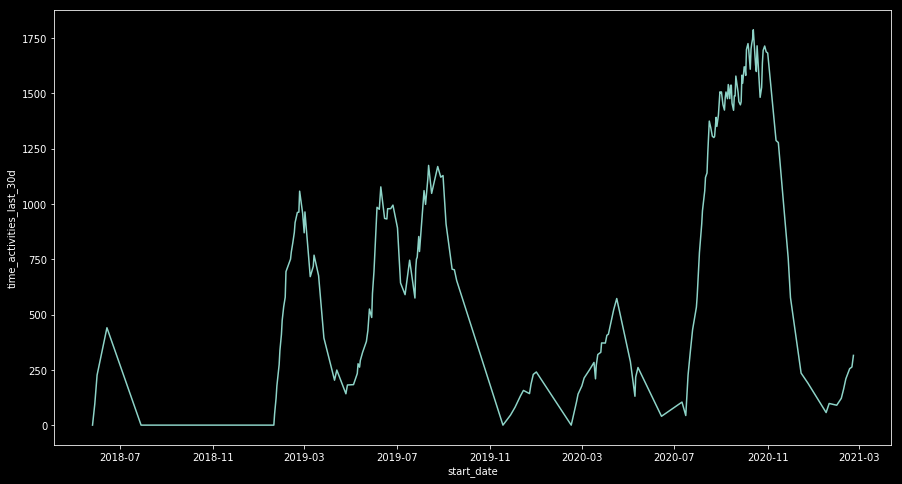

In [6]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(segments_df['start_date'],segments_df['time_activities_last_30d'])
plt.xlabel('start_date')
plt.ylabel('time_activities_last_30d')
plt.show()

**Home Trainer ou pas**

In [7]:
segments_df = pd.get_dummies(segments_df, columns=['type'], drop_first=True)
segments_df = segments_df.rename(columns={'type_VirtualRide': 'type_virtualride'})
segments_df.head(5)

,id,activity_id,athlete_id,name,elapsed_time,moving_time,distance,average_cadence,average_watts,average_grade,maximum_grade,climb_category,average_heart_rate,max_heart_rate,start_time,start_date,time_activities_last_30d,type_virtualride
0,24674235,4831255939,10944546,Champs-Élysées,653,653,6623.10,82.3,202.8,0.0,4.6,0,161.2,170.0,18:46:25,2021-02-22,315.25,1
1,27141377,4831057316,10944546,Epic KOM - Start to Bypass Intersection (Zwift...,424,424,1882.50,77.3,201.2,3.8,47.8,0,157.9,164.0,18:19:40,2021-02-22,315.25,1
2,22501195,4818094466,10944546,Villenave-Technopole,789,789,5100.50,NaN,108.0,0.5,6.4,0,169.0,184.0,14:39:32,2021-02-20,262.78,0
3,3566434,4818094466,10944546,Col du Chateau d'eau,217,217,1190.37,NaN,141.8,2.1,7.3,0,170.7,183.0,14:40:47,2021-02-20,262.78,0
4,20598228,4818094466,10944546,Col du chateau d'eau court,151,151,745.40,NaN,165.4,2.8,5.5,0,177.5,183.0,14:42:02,2021-02-20,262.78,0


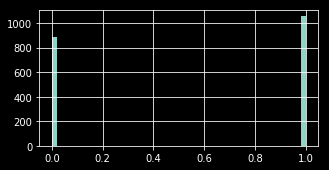

In [8]:
segments_df['type_virtualride'].hist(bins=50, figsize=(5,2.5))
plt.show()

**Temps passé(min) last 30 days en fonction de Home Trainer ou pas**

In [9]:
time_virtual_last_30d = []
time_real_last_30d = []
for date in segments_df['start_date']:
    end_date = date - timedelta(days=1)
    start_date = end_date - timedelta(days=30)
    result = activities_df[activities_df['start_date'].between(start_date,end_date)]
    time_virtual = round((result.loc[result['type'] == 'VirtualRide']['elapsed_time'].sum()/60),2)
    time_real = round((result.loc[result['type'] == 'Ride']['elapsed_time'].sum()/60),2)
    time_virtual_last_30d.append(time_virtual) 
    time_real_last_30d.append(time_real)

In [10]:
segments_df['time_virtual_last_30d'] = time_virtual_last_30d
segments_df['time_real_last_30d'] = time_real_last_30d

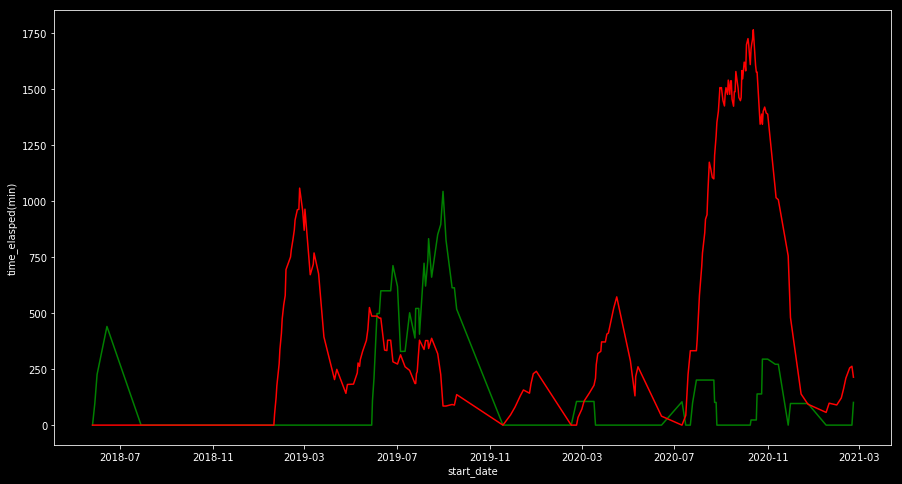

In [11]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(segments_df['start_date'],segments_df['time_real_last_30d'], color='green')
plt.plot(segments_df['start_date'],segments_df['time_virtual_last_30d'], color='red')
plt.xlabel('start_date')
plt.ylabel('time_elasped(min)')
plt.show()

### Récupération ( temps en minutes depuis la derniere activité ) 

In [54]:
days_since_last_activity = []
for activity_id in segments_df['activity_id']:
    try:
        index_activity = activities_df.loc[activities_df['id'] == activity_id].index
        result = activities_df.loc[index_activity]['start_date'].values[0] - activities_df.loc[index_activity+1]['start_date'].values[0]
        result = result.days
    except KeyError:
        result = 0
        
    days_since_last_activity.append(result)
days_since_last_activity

[0,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 24,
 24,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 14,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

In [55]:
segments_df['days_since_last_activity'] = days_since_last_activity
segments_df

,id,activity_id,athlete_id,name,elapsed_time,moving_time,distance,average_cadence,average_watts,average_grade,...,climb_category,average_heart_rate,max_heart_rate,start_time,start_date,time_activities_last_30d,type_virtualride,time_virtual_last_30d,time_real_last_30d,days_since_last_activity
0,24674235,4831255939,10944546,Champs-Élysées,653,653,6623.100,82.3,202.8,0.0,...,0,161.2,170.0,18:46:25,2021-02-22,315.25,1,213.85,101.4,0
1,27141377,4831057316,10944546,Epic KOM - Start to Bypass Intersection (Zwift...,424,424,1882.500,77.3,201.2,3.8,...,0,157.9,164.0,18:19:40,2021-02-22,315.25,1,213.85,101.4,2
2,22501195,4818094466,10944546,Villenave-Technopole,789,789,5100.500,NaN,108.0,0.5,...,0,169.0,184.0,14:39:32,2021-02-20,262.78,0,262.78,0.0,3
3,3566434,4818094466,10944546,Col du Chateau d'eau,217,217,1190.370,NaN,141.8,2.1,...,0,170.7,183.0,14:40:47,2021-02-20,262.78,0,262.78,0.0,3
4,20598228,4818094466,10944546,Col du chateau d'eau court,151,151,745.400,NaN,165.4,2.8,...,0,177.5,183.0,14:42:02,2021-02-20,262.78,0,262.78,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,17782861,1597380847,10944546,RadarStadeMartillac,40,40,303.400,NaN,189.4,1.4,...,0,176.8,182.0,12:42:52,2018-05-26,0.00,0,0.00,0.0,0
1936,3654728,1597380847,10944546,Faux plat chemin de Rochemorin,90,90,541.374,NaN,158.9,2.0,...,0,183.6,188.0,12:47:30,2018-05-26,0.00,0,0.00,0.0,0
1937,3752963,1597380847,10944546,Imitationberg,141,141,872.000,NaN,82.3,-0.0,...,0,168.2,184.0,12:53:34,2018-05-26,0.00,0,0.00,0.0,0
1938,14775448,1597380847,10944546,Château Vignau - Chemin de Couhins,226,226,1431.800,NaN,84.4,-0.6,...,0,155.2,186.0,12:56:14,2018-05-26,0.00,0,0.00,0.0,0
